![ex_screenshot](./img/1.jpg)
![ex_screenshot](./img/2.jpg)

In [18]:
# !pip install tweepy
# !pip install environs
# !pip install TextBlob
# !python -m nltk.downloader all
# !pip install demoji
# !pip install wordcloud

C:\Users\arivu\anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\arivu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\arivu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\arivu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\arivu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_dat

[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\arivu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\arivu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\arivu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package verbnet to
[nltk_data]    |     C:\Users\arivu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to
[nltk_data]    |     C:\Users\arivu\AppData\Roaming\nltk_data...
Traceback (most recent call last):
  File "C:\Users\arivu\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_co

In [19]:
#!pip install tweepy
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv

#pip install environs
from os import environ
load_dotenv()
import json



### Utility Functions
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
import os



#clean
import re
#centi
#pip install TextBlob
from textblob import TextBlob
#tokenize
import nltk
#!python -m nltk.downloader all
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
#remove duplicated words
from itertools import groupby
#emoji to txt : pip install demoji
import demoji 

from PIL import Image
import matplotlib.pyplot as plt
#!pip install wordcloud
from wordcloud import WordCloud

### EXTRACT TWEET WITH THE KEYWORDS AS JSON FILES






![ex_screenshot](./img/3.jpg)

### 4 classes for the twitter

In [20]:
# # # # TWITTER CLIENT # # # #
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = Authenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth,wait_on_rate_limit=True)
        self.twitter_user = twitter_user
    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

In [21]:
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.Authenticator = Authenticator()    
    def stream_tweets(self, hash_tag_list):
        listener = TwitterListener()
        auth = self.Authenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)
        stream.filter(track=hash_tag_list)

In [22]:
class TwitterListener(StreamListener):
    def __init__(self):
        super(StreamListener, self).__init__()
        self.save_file = open('tweets10.json','w')#new_json file
        self.tweets = []
    def on_data(self, tweet):
        try:
            self.tweets.append(json.loads(tweet))
            self.save_file.write(str(tweet))
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)

### If the ENVIRON.GET function is not working, 
### please change the Authenticator() function with the bottom one.

In [23]:
class Authenticator():
    def __init__(self):
        self.CONSUMER_KEY = environ.get('twitter_consumer_key')
        self.CONSUMER_SECRET =environ.get('twitter_consumer_secret')
        self.ACCESS_TOKEN_KEY = environ.get('twitter_access_token')
        self.ACCESS_TOKEN_SECRET = environ.get('twitter_access_secret')
    def authenticate_twitter_app(self):
        auth = OAuthHandler(self.CONSUMER_KEY, self.CONSUMER_SECRET)
        auth.set_access_token(self.ACCESS_TOKEN_KEY, self.ACCESS_TOKEN_SECRET)
        return auth

    
    
# class Authenticator():
#     def __init__(self):
#         self.CONSUMER_KEY = "qDVcN5dTLAZN4OVY2MiRIfUqS"
#         self.CONSUMER_SECRET = "5KY1kPH8XHSVvxcA6LJY5ky5bq3RL8uurfv2T9rqUxXMHLvs6u" 
#         self.ACCESS_TOKEN_KEY = "1335270791294771200-sXVhUS4UP740myytFrpOHGMDkguEPM"
#         self.ACCESS_TOKEN_SECRET = "e2BUGk7OxLknMjy8z7YKSMAmRxHgfKyc2CkJF8h8M8ctZ"
#     def authenticate_twitter_app(self):
#         auth = OAuthHandler(self.CONSUMER_KEY, self.CONSUMER_SECRET)
#         auth.set_access_token(self.ACCESS_TOKEN_KEY, self.ACCESS_TOKEN_SECRET)
#         return auth

![ex_screenshot](./img/4.jpg)

### CLASS about DateBase

In [24]:
class DB():
    
    def __init__(self):

        self.tweets_database_filename = 'tweet777.db'
        
    def create_connection(self,delete_db=False):

        if delete_db and os.path.exists(self.tweets_database_filename):
            os.remove(self.tweets_database_filename)

        self.conn = None
        try:
            self.conn = sqlite3.connect(self.tweets_database_filename)
            self.conn.execute("PRAGMA foreign_keys = 1")
        except Error as e:
            print(e)

        return self.conn

    def create_table(self,conn, create_table_sql, drop_table_name=None):
    
        if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
            try:
                c = conn.cursor()
                c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
            except Error as e:
                print(e)

        try:
            c = conn.cursor()
            c.execute(create_table_sql)
        except Error as e:
            print(e)
            
    def execute_sql_statement(self, conn ,sql_statement):
        cur = conn.cursor()
        cur.execute(sql_statement)
        rows = cur.fetchall()

        return rows
    
    def execute_many_sql_statement(self, conn,sql_statement,arr_inser_tuples):
        print('1')
        cur = conn.cursor()
        print('2')
        cur.executemany(sql_statement, arr_inser_tuples)
        print('3')
        rows = cur.fetchall()

        return rows   

![ex_screenshot](./img/5.jpg)

### CLASS MANIPULATE
#### Json -> Data maipulate -> tuple  List

In [25]:
class Manipulate():
    
    
    def __init__(self, Json_data):
        self.Json_data = Json_data



        
    def JsonToList(self):
        My_list=[]
        Month={'Dec':'12','Jan':1,'Feb':'2','Mar':'3','Apr':'4', 'May':'5', 'Jun':'6', 'Jul':'7', 'Aug':'8', 'Sep':'9', 'Oct':'10', 'Nov':'11'}
        for json in self.Json_data:
            date=json['created_at'].split(" ")
            my_T_DATE = date[5]+'-'+Month[date[1]]+'-'+date[2]+' '+date[3]
            my_tuple = (json['id'], my_T_DATE, json['user']['id'],json['text'],json['user']['followers_count'],json['retweet_count'],json['favorite_count'],json['lang'])
            My_list.append(my_tuple)
        return My_list
    
    def JsonToList_Processed(self):
        My_list_Processed=[]
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        for json in self.Json_data:

            if(json['lang']=='en'):
                json['text'] = re.sub('@[A-Za-z0–9]+', '', json['text']) #Removing @mentions
                json['text'] = re.sub('#', '', json['text']) # Removing '#' hash tag
                json['text'] = re.sub('RT[\s]+', '', json['text']) # Removing RT
                json['text'] = re.sub('https?:\/\/\S+', '', json['text']) # Removing hyperlink
                print(json['text'])
                json['text']=emoji_pattern.sub(r'', json['text'])
                json['text'] = " ".join([k for k,v in groupby(json['text'].split())])#remove duplicated words
                #print(json['text'])
                #extract sentiment and subjectivity value from the text ans put it into the DB
                subjectivity=TextBlob(json['text']).sentiment.subjectivity
                polarity=TextBlob(json['text']).sentiment.polarity
                my_tuple=(json['id'],json['text'],subjectivity,polarity)
                My_list_Processed.append(my_tuple)
        return My_list_Processed
                

### 'MAIN' FOR GATHERING TWEETS
### in realtime with the KEY WORKDS

In [26]:
# get json file from twiter (streeming)
# if __name__ == '__main__':
#     Authenticate using config.py and connect to Twitter Streaming API.
#     hash_tag_list = ["suiside", "depressed","depress","depression", "mentalillness"]
#     twitter_streamer = TwitterStreamer()
#     twitter_streamer.stream_tweets( hash_tag_list)

### 'MAIN' FOR INSERTING TWEETS AND MOD_TWEETS
### into DB

In [27]:
if __name__ == '__main__':


    json_data = []
    twt_json=['tweets.json','tweets1.json','tweets2.json','tweets3.json','tweets4.json','tweets5.json','tweets6.json','tweets7.json','tweets8.json','tweets9.json']
    for js in twt_json:
        with open(js, 'r') as f:
            for line in f:
                try:
                    json_data.append(json.loads(line))
                except json.decoder.JSONDecodeError:
                    pass # skip this line 


    #create DB object
    my_db=DB()
    
    #make a connection
    conn=my_db.create_connection()
    
    #Create TweetDB
    create_table_sql="CREATE TABLE TweetDB (Tweet_ID Integer not null primary key, T_DATE datetime, User_id Integer not null, tw_text text not null, followers_count integer, retweet_count Integer, favorite_count Integer, language text);"
    my_db.create_table(conn, create_table_sql, drop_table_name='TweetDB')
    
    #Insert the Query
    aa=Manipulate(json_data)
    arr_inser_tuples=aa.JsonToList()
    insert_sql_query="""INSERT INTO TweetDB (Tweet_ID, T_DATE, User_id , tw_text , followers_count , retweet_count , favorite_count, language)
             values (?, ?, ?, ?, ?, ?, ?,?);"""
    my_db.execute_many_sql_statement(conn,insert_sql_query,arr_inser_tuples)

    #Create anal_DB
    create_table_sql_Sub_Pol="CREATE TABLE Sub_Pol (Tweet_ID Integer not null primary key, Pruned_text text, subjectivity Integer, polarity Integer);"
    my_db.create_table(conn, create_table_sql_Sub_Pol, drop_table_name='Sub_Pol')    
    #Process the txt and get list for pruned_txt+centimental anlysis 
    arr_inser_tuples_Sub_Pol=aa.JsonToList_Processed()
    insert_sql_query_Sub_Pol="""INSERT INTO Sub_Pol (Tweet_ID, Pruned_text, subjectivity , polarity )
             values (?, ?, ?, ?);"""    
    my_db.execute_many_sql_statement(conn,insert_sql_query_Sub_Pol,arr_inser_tuples_Sub_Pol)

    


1
2
3
: how to make your twitter both blue and pink — a thread: 
thinking about jeno blue hair 
imagine if the dteam got matching hair colors... like george dyed his hair blue, dream did his green, and sapnap did his red 🥺🥺🥺
MY GOT DAMN HAIR IS GREEN NOT BLUE
Sushant was an intellectual.
He was not depressed.
He was not suicidal.
He was murdered.
We have taken an Oath4SSR… 
@666tone: blue jeans 
I know better. 
No woman whose in love or have love for a man is going to turn on him for no reason, out of the blu… 
: Total tweets for Rahul Vaidya with all taglines by audience- 3.7M 
Chubina with all taglines with the help of PR and blue tic…
: i put Blue &amp; Grey over jungkook and taehyung's video

Look the difference between locked down California and wide open Florida is 1.2%.. that’s it!! Lock downs aren’t th… 
 it's blue is the warmest color which is gay but super terrible
__: Finally ID unlock ho gai !!!
Yeh blue chidiya ka kuch karna padega.....
.
WE ARE WITH RAHUL VAIDYA
delfisdoo

: Aran in a turtleneck is a superior concept 
 so what im seeing is blue hair real?
: DON’T 👏🏻 CALL 👏🏻 YOURSELF 👏🏻 A 👏🏻 DOCTOR 👏🏻 UNLESS 👏🏻 YOU 👏🏻 TRAVEL 👏🏻 THROUGH 👏🏻 SPACE-TIME 👏🏻 IN 👏🏻 A 👏🏻 BLUE 👏🏻POLI…
 you’re my blue 🙇🏻‍♀️💙
_silenced:    Washington State is a red state that’s kept Blue because of Vote By Mail
: big blue 
: We're officially headed to a January runoff election against Kelly Loeffler and we need your help to win. Chip in righ…
: for blue cheese
Like for ranch 
🖤: A bunch of stutters and blue light hits the demon as he was kinda stunned by that shock pistol. Ouch.
 I SAW A SS ON THE TL AND THE STRANDS LOOKED A BIT BLUE TO ME .. 🧐
JENO BLUE HAIR IS STUNNING🥺 
_Rare: Dear    

Open the tag " WE ARE WITH RAHUL VAIDYA" and you will see only people's tweets...…
Roses are red and violets are blue, one voice for justice, me and you Oath4SSR
 Left right, blue red, no longer makes any sense in my view.
A new Humanist party needs to rise above it all...
: who cares about non st

: Thanks for building an alternative compute system for the world, Tlon Corporations
 They didn't agree to reopen the Blue Line, as I reported months ago
: Can I just stay at home for several weeks and be depressed?
: Lighting practise~ ✨ feat. teen moshang and yes, MBJ is literally a blue blood...with frosty bandaids ╮(. ❛ ᴗ ❛.)╭ 

漠尚 svs…
Check out what I just added to my closet on Poshmark: 2 Left XS 3-5lb Pet Top Blue White  Happy Chanukah.… 
Buzzing cos its new car day 🥳 but sad cos I'll miss my wee blue swift 😭
minho wear ur blue light blocking glasses plz
 wow blue red
Traditional Beard Razor / Straight razor straight cutters / Barber razor

haircut… 
We must vigorously, overwhelmingly and unambiguously VOTE IN BOTH Warnock &amp; Ossoff, to flip senate ending Mitch as… 
1776: Here is a question for   1   et al..
All of the donations you ask for.…
   Abrams said it in the interview. 85000 "new" voters have applied for mail i… 
: ‘Blue &amp; Grey’ remains in the Top 80 on the Worl

“Great, since we are no lon… 
: _ Ok well next time you see me come say Hi I am super friendly i'm usually wearing a Schlatt &amp; Co hoodie and…
choir makes me depressed
3x We need your help 🆘
Did you witness this dognapping in Horn Lane Woodford green IG8 on the 13-12-2020
T… 
Happy 3 hours  ahhh TheBestDrive Roses are red violets are blue _L is Hmmmm☺☺Queen   is tha B… 
Thirsty Sluts, Anna de Ville Vs Bianka Blue
42069 cyan/blue/red/black/grey/hot pink
_2426D: Roses are red 
Violets are blue 
Let's oppose evildoers 
Together me &amp; you !! 

Oath4SSR
: my twitter look like I’m single, taken, depressed, in love, heartbroken, a player and loyal so don’t think you know me.
: Ok ladies and gentleman. Lets do some Auctions-sales....
I have some stuff for sale.  Email me @  Gianna.com.…
VOTE FOR OSSOFF AND WARNOCK!!! VOTE BLUE
omg Milotic 😍 I remember playing Pokémon Emerald and force feeding Feebas some blue pokéblocks 😅
2:  Let’s make sure  &amp;  win. Please gather blue voters from yo

: my twitter look like I’m single, taken, depressed, in love, heartbroken, a player and loyal so don’t think you know me.
I got: blue 🫐

Reply anything and I’ll give you a color for you to find pics of your ult/biases wearing it 
: New youtube video! 🥳 
Blue Spandex Dress, Wolford Pantyhose &amp; Heels Try On 💕 
: [MEDIA] Australian Media reported on V’s songwriting skills being praised by Knetizens 

Blue and Grey has become the BTS’…
Check out what I just added to my closet on Poshmark: Athleta Blue Aztec Tribal Print Swim Bikini Bottom.… 
Check out what I just added to my closet on Poshmark: Robert Graham Shirt Graph Stripes Blue White 10/12.… 
wings do bts e to esperando meu blue hour do txt chegar
: this is very, very promising.  we’ll here again about it. The majority of covid19 patients who deteriorate are elderl…
3: Fictional Red and Blue wives that kill maniacal a**holes together? 
: funniest twitch phenomena to me is when my stream goes down or my computer blue screens and im

 _Our_Watch Blue healer
Bill to dissolve Knesset set for delay until next week, angering Blue and White 
 Small Satellite Leader Blue Canyon Technologies Completes CDR for DARPA Blackjack Program… 
_gfd_cn: Want to watch the blue sky and soft clouds with you, the continuous rain, the rumbling snow, the white snowflakes and the…
i’m depressed but i am gonna ignore it so hard bc im getting starbucks and money today
: my twitter look like I’m single, taken, depressed, in love, heartbroken, a player and loyal so don’t think you know me.
Q: What are the world's most beautiful snakes?

A: Depends on your idea of "beauty" but my opinion, these 4 are str… 
____: Americans be like “I worked 3 jobs to pay my bills, barely spent time with my kids and family, got depression while doi…
: (OAP) has just reported her dog has been stolen while out walking in Horn Lane Woodford Green tonight. A woman man &amp; 3 y…
: my twitter look like I’m single, taken, depressed, in love, heartbroken, a player and 

10 I think I will get a cloth type. The one people just sew, because the pain the blue surgical masks giv… 
4: Nativity Set, Nativity Scene, Nativity Sets, Blue and White Porcelain Set of 3, Free Shipping  via …
  please notice me for once and pick me. I really need help financially in promoting my hairstyli… 
5: 4real In December of 1998 my father took his own life. I’ve written a book about my teenage life during that…
: TXT MINISODE1: BLUE HOUR UNSEALED ALBUM GIVEAWAY

- follow me 
- retweet 
- open notifs for claiming 
- ends in 30mins ht…
: Please retweet 🙏🏼 
____: Americans be like “I worked 3 jobs to pay my bills, barely spent time with my kids and family, got depression while doi…
: Beach Blast Surge Womens Sunglasses Blue Black Frame Silver Lens NWT Scratches -  
: my twitter look like I’m single, taken, depressed, in love, heartbroken, a player and loyal so don’t think you know me.
society if billie died her hair back to a shade of blue 
I voted blue today in Georgia, and it 

Cheers to the depression for winning tonight
Tw// suicide roleplay dsmp
Even tho I get it’s a roleplay it’s so popular now it’s in peoples lives and idk just so… 
omg thank you!! i just can’t get enough blue💙
help my boyfriend thinks I’m a smurf (small and blue) 
: Honey the Blue Eyes White Nikes stay ON during sex 
: Honey the Blue Eyes White Nikes stay ON during sex 
Sliding into depression like 
_k  Definitely. Ca. Isn't a  prosperous state anymore ran down,-literally, by the destructive left. Leaning blue.
_usa CIA is in code blue delete all the "rabbits" from the hard drive if you know what im sayin
I like to interrupt your scrolling for this brief message.

Having a mentalillness is not an excuse for you to an… 
3: Drey akiambiwa yeye ni mnono mnacheka lakini dem akiambiwa the exact same thing suddenly mnakua psychologists ati they…
209: TEEN VOGUE - JUNGWON cut:

ENHYPEN describe Jungwon as "embodying the color blue" because of his calm and reliable nat…
2warn Add that they no l

: blue hour is at 43 million views while cysm is at 45 million. can you see the difference? it's just december but we've alrea…
: Tiliqua Tuesday! 💙 Is that a thing? It should be, Blue-tongues are the best. 
: Your wife is a managing director at Goldman Sachs.
: Honey the Blue Eyes White Nikes stay ON during sex 
I think I’m✨depressed✨
Alice usually wears a blue maid costum and a brown-colored boots. - [Ali-chan]
: This was great for at least a day trade today. And maybe more if $ZM can break out above resistance on the daily chart…
_syira Rose and blue
: He’s not going to listen. He won’t admit his app is broken. Too proud to face defeat.
: My family has COVID &amp; the health authority told my mom that if her lips turn blue to go to the hospital. She’s Black. Her…
: Honey the Blue Eyes White Nikes stay ON during sex 
: My family has COVID &amp; the health authority told my mom that if her lips turn blue to go to the hospital. She’s Black. Her…
_ i was thinking of royal blue, thank yo

It is human nature to get depressed by setbacks, but it is superhuman task to rise above your circumstances and rew… 
It's a clear blue sky,  as beautiful as your life will  e today 
: ⚠️ MISSING PERSON AT RISK ⚠️

We need your help in locating 91-year-old Yutam Wang who was last seen wearing a grey jacket, green…
14  I feel for you, there only one party far right and right wing blue dogs
: My family has COVID &amp; the health authority told my mom that if her lips turn blue to go to the hospital. She’s Black. Her…
_C: Giggling blue couple ❤💙 
: feeling blue 
I NEED THIS BLUE DRIP ! 
: my twitter look like I’m single, taken, depressed, in love, heartbroken, a player and loyal so don’t think you know me.
: I'm in the heart of blue California, nobody is celebrating, no fireworks, no horns, no parties. ZERO people are buying t…
4794: Watercolor Painting · Night Sky
by 12 yrs old girl

Follow 4794 

simplyart4794  painting drawing fineart…
: My family has COVID &amp; the health authority t

_ I was depressed when I hit 40 strangely enough when I got to 41 I was fine because I was not 40 anymore!
: If your psychotherapist is FAT,

Fire him!

He is also depressed. 

BetterTogether
: Oh WOW. Depression as a grey rhino. Thank you  _bighit  (방탄소년단) for expressing this so beautifully in Blue &amp; Grey. Very muc…
____: Americans be like “I worked 3 jobs to pay my bills, barely spent time with my kids and family, got depression while doi…
@2Lyrical4You: This shit happened because MPD escorted them the last time they were here and allowed them to beat up protestors! We will…
: Do you know what is schizophrenia and how dangerous it is? Here's why we should stop the stigma against schizophrenia an…
: My family has COVID &amp; the health authority told my mom that if her lips turn blue to go to the hospital. She’s Black. Her…
: My family has COVID &amp; the health authority told my mom that if her lips turn blue to go to the hospital. She’s Black. Her…
: my twitter look like I’m sin

time to be depressed for the entire month again😁
 I’ll be okay!! I think it’s just my depression creeping up on me
: After graduating from art college my depression hit it's hardest and I dropped art for next 7 months. 
I finally picked up ta…
_Ab1: Depression start wit d family, sad but true.. 😩
: depressed but make it ✨spicy✨ 
Yes and still going through it
: People dont fake depression they fake being ok...remember that
: kids who used to do all of these are depressed now 
 Here's the paperback of my poetry book about my experiences living with depression

like yeah, i am a sad depressed ass bitch but you ain’t had to roast me in the middle of a death run. DAMN 🥴😂
: when I’m dehydrated and taking another depression shower 
_: Lmao how are you people able to have any kind of fun in your lives? Like a black hole, you just suck the life out of every…
:  This is 25 year old Trump being interviewed. His killer instinct is genius and he's using it. For those w…
: kids who used to do all o

4: parents can spot fake friends but can't even notice their depressed kids 😭
: New on BrainDr's Blog: "Understanding the Anxiety and Depression Types—Type 4: Over-Focused Anxiety/Depression" 
: my twitter look like I’m single, taken, depressed, in love, heartbroken, a player and loyal so don’t think you know me.
: POV: you're an ubereats driver arriving at my hungry depressed goblin lair 
: kids who used to do all of these are depressed now 
shivani 
Really painful when she cried. This kid so depressed. Sensitive girl. Pity her. She definitely fun loving… 
4: parents can spot fake friends but can't even notice their depressed kids 😭
: If I want to be depressed, I weigh myself. If I want to be super duper depressed, I listen to "I Started a Joke" by the Be…
 Well you could always try magic mushrooms. A single dose given under medical supervision was found to cur… 
:  ! Why so desperate &amp; depressed
: No one is talking about this. No one. Media blackout. I heard from just 1 teacher a

: kids who used to do all of these are depressed now 
if i had hands on help with my child my depression would not be here
: why is nobody talking about how depression causes memory loss?
: POV: you're an ubereats driver arriving at my hungry depressed goblin lair 
it’s called gifted kid burnout and depression 😋😎
//Oh my fucking god
Also I'm body depressed, if that make sense?? I'm not sad, but I have that low energy vibe where I don't want to do… 
 This is 25 year old Trump being interviewed. His killer instinct is genius. He's using it. Pres. Trump h… 
_: “I love ur music taste “ thanks I have depression
 this is on par with when ppl projected mental illnesses on idols and went oh idol xy has Depression and… 
This Weather Isn’t Helping My Depression
Thank you all for helping me support this wonderful organization!  You have contributed in so many ways by supporti… 
: kids who used to do all of these are depressed now 
: Who do you trust more with our economy?

A self-made billionaire

depressed, sleep deprived, and a ball of anxious nerves but at least i can be cute
  shitty depression joke maybe? 
87 And it can make things significantly worse. That’s one of the worst parts of it, imho. Makes me think tha… 
: Depression is your soul telling you it’s tired of being the character you’ve been playing

- Jim Carrey
: holy trinity of depression 
seasonal depression is real my friends ✌🏻😗😢
24 No more depress be happy
4: parents can spot fake friends but can't even notice their depressed kids 😭
: kids who used to do all of these are depressed now 
: Today sucks. anxiety depression 

I post this because if a Cop with 30 years can admit he has mentalhealth issues...so…
: Tell me you’re depressed without actually saying you’re depressed
Bra if u got to ask me if I fucked yo bitch then I did bra don't hurt yo self depressed boi😂
Y’all ain’t depressed, yall just broke.
 Yo my new prescription just came in like that im glad it’s not just me getting my the clinical depression exp

4: parents can spot fake friends but can't even notice their depressed kids 😭
: A mental health crisis is growing in the United States as the effects of the COVID-19 pandemic collide with seasonal depression.…
2814 The only way they lose is if people don’t vote.  It seems like there’s a concerted effort by democ… 
4: parents can spot fake friends but can't even notice their depressed kids 😭
 Hind I can’t wait to beat up my demons on the 21st...I want one on one w depression
I'm not hyper, I just haven't been depressed in a while.
4: parents can spot fake friends but can't even notice their depressed kids 😭
while you’re here, here’s a (crappy) painting for the sweetness when i was having a depression episode and just wan… 
: Who do you trust more with our economy?

A self-made billionaire who gave our country the best economy it's ever seen?…
____: Americans be like “I worked 3 jobs to pay my bills, barely spent time with my kids and family, got depression while doi…
Can depression leav

Soul: depressed
4: parents can spot fake friends but can't even notice their depressed kids 😭
Man coming back to Twitter after 30 days really makein me see, why I was depressed, n felt like I wasn’t going anyw… 
: Bubble wrap knows no age or mood.
set. Regardless of whether u're discouraged or depressed, you'd still Pop😁😁.. TRUE or…
: Honestly if millennials become a generation who just keep periodically wearing masks out I'm fine with that, I've alwa…
4: parents can spot fake friends but can't even notice their depressed kids 😭
4: parents can spot fake friends but can't even notice their depressed kids 😭
Lol you naive mfs really think it’s that easy to “treat” huh? You can’t imagine how much depression can drag you do… 
Wow I am depressed
: Who do you trust more with our economy?

A self-made billionaire who gave our country the best economy it's ever seen?…
4: parents can spot fake friends but can't even notice their depressed kids 😭
4: parents can spot fake friends but can't even no

: we are all going to be traumatized when this is over, the way people from the Great Depression were weird about specif…
@_essence_alexis: i hope next year be different, i went thru depression too many times this year😣
4: parents can spot fake friends but can't even notice their depressed kids 😭
4: parents can spot fake friends but can't even notice their depressed kids 😭
4: parents can spot fake friends but can't even notice their depressed kids 😭
4: parents can spot fake friends but can't even notice their depressed kids 😭
: I should buy Agbalumo ₦8,500 because e wear lingerie?
60134572: But in Jiah case different as accused is frm BW gang !

Justice4SSRDec17
: New post The 2020 Worldwide Corona Crisis: Destroying Civil Society, Engineered ... has been published on SGT ... - 
: I should buy Agbalumo ₦8,500 because e wear lingerie?
 Well, now I'm depressed.
CW-- mental illness

I won't deny the depression and anxiety being there, nor some very deep PTSD issues I'm still… 
 TRUMP’S GR

In [28]:
json_data

[{'created_at': 'Mon Dec 14 05:33:51 +0000 2020',
  'id': 1338356506530615296,
  'id_str': '1338356506530615296',
  'text': ': how to make your twitter both blue and pink — a thread:',
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'truncated': False,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 1250808191883120640,
   'id_str': '1250808191883120640',
   'name': 'dy; ᴷᵀᴴ¹',
   'screen_name': 'vlossomin',
   'location': '박지민',
   'url': 'http://mikrokosmos.xn--c6h/',
   'description': '୧𝚝𝚊𝚎𝚑𝚢𝚞𝚗𝚐 ✦ 𝑌𝑜𝑢 𝑎𝑛𝑑 𝐼 𝑎𝑟𝑒 𝑡𝘩𝑒 𝑜𝑛𝑙𝑦 𝑜𝑛𝑒𝑠 𝘩𝑒𝑟𝑒 ˒✰',
   'translator_type': 'none',
   'protected': False,
   'verified': False,
   'followers_count': 580,
   'friends_count': 671,
   'listed_count': 3,
   'favourites_count': 8411,
   'statuses_count': 2489,
   'created_at': 'Thu Apr 16 15:28:20 +0000 2020',
   'ut

In [29]:
print("the number of Json files(tweets)",len(json_data))

the number of Json files(tweets) 8389


### TWEET DB (DB for Originanl TWEETS)

In [30]:
df = pd.read_sql_query("""SELECT * FROM TweetDB """, conn)
df

Tweet_ID               T_DATE              User_id  \
0     1338356506530615296  2020-12-14 05:33:51  1250808191883120640   
1     1338356508778668035  2020-12-14 05:33:51  1279775309106036736   
2     1338356510200483843  2020-12-14 05:33:52  1299690503177338881   
3     1338356512419246081  2020-12-14 05:33:52  1313952185353269248   
4     1338356513539194880  2020-12-14 05:33:52  1119980300694622208   
...                   ...                  ...                  ...   
8384  1339464074673983488  2020-12-17 06:54:56   900270579038785536   
8385  1339464077479796739  2020-12-17 06:54:56  1066331987118411782   
8386  1339464077572272129  2020-12-17 06:54:56            451567891   
8387  1339464077735829506  2020-12-17 06:54:56  1289350544545456128   
8388  1339464080495681536  2020-12-17 06:54:57           3214330493   

                                                tw_text  followers_count  \
0     RT @vmingaIIery: how to make your twitter both...              580   
1     thinking about jeno blue hair https://t.co/wPk...             1825   
2                                Bayangin jay blue hair             1325   
3     imagine if the dteam got matching hair colors....             1590   
4                    MY GOT DAMN HAIR IS GREEN NOT BLUE               50   
...                                                 ...              ...   
8384  RT @KissTV4: parents can spot fake friends but...             1080   
8385  RT @KissTV4: parents can spot fake friends but...             2422   
8386  RT @KissTV4: parents can spot fake friends but...              160   
8387  Hoje em dia não sinto mais nada pra escrever, ...               31   
8388  @julesdmuells @caitiehannan Exactly. 99% of my...             1525   

      retweet_count  favorite_count language  
0                 0               0       en  
1                 0               0       en  
2                 0               0       in  
3                 0               0       en  
4                 0               0       en  
...             ...             ...      ...  
8384              0               0       en  
8385              0               0       en  
8386              0               0       en  
8387              0               0       pt  
8388              0               0       en  

[8389 rows x 8 columns]

### TWEET DB (DB for Pruned_text, subjectivity, and polarity TWEETS)

In [31]:
df_ = pd.read_sql_query("""SELECT * FROM Sub_Pol """, conn)
df_

Tweet_ID                                        Pruned_text  \
0     1338356506530615296  : how to make your twitter both blue and pink ...   
1     1338356508778668035                      thinking about jeno blue hair   
2     1338356512419246081  imagine if the dteam got matching hair colors....   
3     1338356513539194880                 MY GOT DAMN HAIR IS GREEN NOT BLUE   
4     1338356514113765377  Sushant was an intellectual. He was not depres...   
...                   ...                                                ...   
6642  1339464066427969538  I'm more depressed than I was in 2016, and tha...   
6643  1339464074673983488  4: parents can spot fake friends but can't eve...   
6644  1339464077479796739  4: parents can spot fake friends but can't eve...   
6645  1339464077572272129  4: parents can spot fake friends but can't eve...   
6646  1339464080495681536  Exactly. 99% of my depression comes from livin...   

      subjectivity  polarity  
0         0.200000 -0.050000  
1         0.100000  0.000000  
2         0.133333 -0.066667  
3         0.200000 -0.100000  
4         0.400000  0.300000  
...            ...       ...  
6642      0.655556 -0.266667  
6643      1.000000 -0.500000  
6644      1.000000 -0.500000  
6645      1.000000 -0.500000  
6646      0.225000  0.075000  

[6647 rows x 4 columns]

### HOW TO MAKE THE DEPRESSION_SCORE MODEL

#### 1. TOKENIZE the refined TEXT with the KEY words that polarity value is lower than -0.5

#### 2. TOKENIZE the refined TEXT with the KEY words that polarity value is 0

#### 3. Result from 1st step - Result from 2nd step

#### 4. GIVE panalty to stop words from the result of step 4.

#### 5. Delete KEY WORDS and Ad materials from the result of step 3.


![ex_screenshot](./img/6.jpg)
![ex_screenshot](./img/7.jpg)

### We can see as subjectivity values going up, the variance of polarity is going up

In [32]:
df_uni = pd.read_sql_query("""SELECT polarity,subjectivity ,followers_count,t.T_DATE FROM Sub_Pol s, TweetDB t where s.Tweet_ID=t.Tweet_ID and followers_count <100 """, conn)

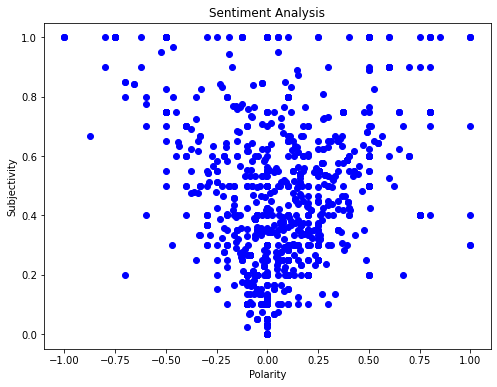

In [33]:
#high subjectivity high var() for the polarity
plt.figure(figsize=(8,6)) 
for i in range(0, df_uni.shape[0]):
      plt.scatter(df_uni['polarity'][i],df_uni['subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

## 1. TOKENIZE the refined TEXT with the KEY words that polarity value is lower than -0.5



In [34]:
df_SUB_POL = pd.read_sql_query("""SELECT * FROM Sub_Pol where polarity < -0.5""", conn)
Pruned_TXT_Neg6=df_SUB_POL['Pruned_text']
fdist=FreqDist()
pst=PorterStemmer()
lst=LancasterStemmer()
for ele in Pruned_TXT_Neg6:
    ele_tok=word_tokenize(ele)
    for tok_word in ele_tok:
        fdist[tok_word.lower()]+=1
df_SUB_POL

Tweet_ID                                        Pruned_text  \
0    1338356540508614658  And if they didn't get the vaccine, they would...   
1    1338356664802697219  : I was too sad &amp; depressed this yearI wil...   
2    1338356849599397889  It won’t be a bad day for two senators at all!...   
3    1338460260835725314  Mean while in Google Hq INTRUDER ALEBLUE FOX I...   
4    1338460341768863745  We now have hate and senate grid lock because ...   
..                   ...                                                ...   
97   1339462675068297217  It’s so sad how much I fucking hate you and ho...   
98   1339462946867580929  @_MightyB: I tell anyone idc, idc. Sex is lite...   
99   1339463034226565121  : [+18 Release TRIBUTE] Ghost queen is here to...   
100  1339463426981150720  7: Hold each day close. Never be afraid to fai...   
101  1339463777369141253  : Lord, I lift up those of us who are struggli...   

     subjectivity  polarity  
0        0.666667 -0.700000  
1        1.000000 -0.625000  
2        0.666667 -0.875000  
3        0.843750 -0.656250  
4        0.900000 -0.800000  
..            ...       ...  
97       0.950000 -0.650000  
98       0.800000 -0.600000  
99       1.000000 -0.750000  
100      0.500000 -0.533333  
101      0.200000 -0.700000  

[102 rows x 4 columns]

In [35]:
fdist
fdist_top_10=fdist.most_common(10)
fdist_top_10


[('i', 71),
 (':', 52),
 ('.', 41),
 ('to', 41),
 ('’', 38),
 (',', 37),
 ('depression', 37),
 ('and', 36),
 ('a', 34),
 ('it', 30)]

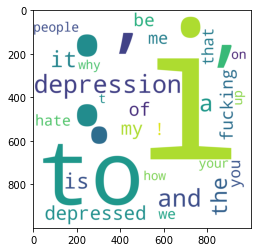

In [36]:
wc_pol_Np5 = WordCloud(background_color="white",width=1000,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(fdist)
plt.imshow(wc_pol_Np5)


## 2. TOKENIZE the refined TEXT with the KEY words that polarity value is 0



In [37]:
df_SUB_POL_midP = pd.read_sql_query("""SELECT * FROM Sub_Pol where polarity = 0 """, conn)
Pruned_TXT_mid=df_SUB_POL_midP['Pruned_text']
fdist_mid=FreqDist()
for ele in Pruned_TXT_mid:
    ele_tok=word_tokenize(ele)
    for tok_word in ele_tok:
        fdist_mid[tok_word.lower()]+=1


In [38]:
df_SUB_POL_midP

Tweet_ID                                        Pruned_text  \
0     1338356508778668035                      thinking about jeno blue hair   
1     1338356514344611846                               @666tone: blue jeans   
2     1338356516613627906  : Total tweets for Rahul Vaidya with all tagli...   
3     1338356523097985024  __: Finally ID unlock ho gai !!! Yeh blue chid...   
4     1338356526088671232          delfisdoodles: blue gfs commission for !!   
...                   ...                                                ...   
2304  1339464030763683842  Currently: shaking my ass till I shake all the...   
2305  1339464036442923009  _tu: I want whatever functional depression Tay...   
2306  1339464052045594625  I mentioned it on the episode we recorded for ...   
2307  1339464061378064385  I can’t decide whether I would sleep forever o...   
2308  1339464063777124353        “did you know lizards can have depression?”   

      subjectivity  polarity  
0            0.100         0  
1            0.100         0  
2            0.425         0  
3            0.550         0  
4            0.100         0  
...            ...       ...  
2304         0.400         0  
2305         0.000         0  
2306         0.000         0  
2307         0.000         0  
2308         0.000         0  

[2309 rows x 4 columns]

In [39]:
fdist_mid
fdist_mid_top_10=fdist_mid.most_common(10)
fdist_mid_top_10

[(':', 1256),
 ('blue', 949),
 ('i', 787),
 ('the', 785),
 (',', 762),
 ('.', 726),
 ('to', 510),
 ('of', 491),
 ('and', 491),
 ('depression', 431)]

In [40]:
wc_fdist_mid = WordCloud(background_color="white",width=1000,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(fdist_mid)
plt.imshow(wc_fdist_mid)


## 3. Result from 1st step - Result from 2nd step


In [41]:
sum=0
sum_mid=0
for ele in fdist:
    #print(fdist[ele])
    sum=sum+fdist[ele]
print('The number of tok_1st',sum)

for ele_ in fdist_mid:
    #print(fdist_mid[ele_])
    sum_mid=sum_mid+fdist_mid[ele_]
print('The number of tok_2nd',sum_mid)

The number of tok_1st 2004
The number of tok_2nd 33345


In [42]:
for ele in fdist:
    fdist[ele]=fdist[ele]/sum

In [43]:
for ele_ in fdist_mid:
    fdist_mid[ele_]=fdist_mid[ele_]/sum_mid

In [44]:
for ele in fdist_mid:
    if(fdist[ele]!=0):
        fdist[ele]=fdist[ele]-fdist_mid[ele]

In [45]:
fdist.most_common(30)

[('i', 0.01182740232535379),
 ('fucking', 0.010948054408501934),
 ('be', 0.009137864621633924),
 ('it', 0.008402358575696111),
 ('hate', 0.007954042432454029),
 ('’', 0.006186547283301145),
 ('depression', 0.005537597768924587),
 ('me', 0.005290857780615108),
 ('to', 0.005164434962733102),
 ('a', 0.005030245402133206),
 ('bad', 0.00499001996007984),
 ('up', 0.004728464797799812),
 ('[', 0.004660135419668984),
 (']', 0.004660135419668984),
 ('why', 0.004499368334855256),
 ('people', 0.004488548768410099),
 ('we', 0.0044860795727483405),
 ('how', 0.004409399823834113),
 ('is', 0.004206297257037882),
 ('here', 0.0040603453461947004),
 ('worst', 0.003493013972055888),
 ('+18', 0.003493013972055888),
 ('tribute', 0.003493013972055888),
 ('queen', 0.003493013972055888),
 ('________', 0.003493013972055888),
 ('nsfwdiives', 0.003493013972055888),
 ('nsfw…', 0.003493013972055888),
 ('sad', 0.0034330349647084596),
 ('release', 0.0034330349647084596),
 ('ghost', 0.0034330349647084596)]


## 4. GIVE penalty to stop words from the result of step 4.


In [46]:
#gives penalty to the stop words
for ele in fdist:
    #print(fdist[ele])
    if ele in stopwords.words('english'):
        fdist[ele]=fdist[ele]/10


In [47]:
fdist.most_common(10)

[('fucking', 0.010948054408501934),
 ('hate', 0.007954042432454029),
 ('’', 0.006186547283301145),
 ('depression', 0.005537597768924587),
 ('bad', 0.00499001996007984),
 ('[', 0.004660135419668984),
 (']', 0.004660135419668984),
 ('people', 0.004488548768410099),
 ('worst', 0.003493013972055888),
 ('+18', 0.003493013972055888)]


## 5. Delete KEY WORDS and Ad materials from the result of step 3.

In [48]:
#delete the KEY word(depression) as well as ad materials
fdist.pop('+18')
fdist.pop('’')
fdist.pop('[')
fdist.pop(']')
fdist.pop('________')
fdist.pop('❤️')
fdist.pop('nsfwdiives')
fdist.pop('nsfw…')
fdist.pop('(')
fdist.pop('depression')


0.005537597768924587

## SCORING TABLE and WORD CLOUD for the result

In [49]:
fdist.most_common(20)

[('fucking', 0.010948054408501934),
 ('hate', 0.007954042432454029),
 ('bad', 0.00499001996007984),
 ('people', 0.004488548768410099),
 ('worst', 0.003493013972055888),
 ('tribute', 0.003493013972055888),
 ('queen', 0.003493013972055888),
 ('sad', 0.0034330349647084596),
 ('release', 0.0034330349647084596),
 ('ghost', 0.0034330349647084596),
 ('heal', 0.0034330349647084596),
 ('background', 0.0034030454610347455),
 ('!', 0.0025918024499808293),
 ('know', 0.0025825092953993046),
 ('bonds', 0.00249500998003992),
 ('day', 0.0024242114062473347),
 ('w', 0.0023750519653450634),
 ('god', 0.0022550939506502067),
 ('things', 0.0020451674249342073),
 ('schizophrenia', 0.001996007984031936)]

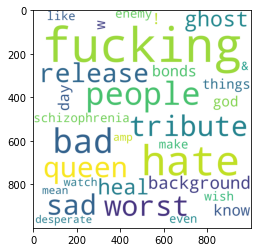

In [50]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=30,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(fdist)
plt.imshow(wc)

![ex_screenshot](./img/8.jpg)

## CHECK the DP_score with one of the tweet in the DB

In [51]:
example = pd.read_sql_query("""SELECT * FROM Sub_Pol s join TweetDB t on s.Tweet_ID = t.Tweet_ID where s.Tweet_ID=1339462675068297217 """, conn)
example['Pruned_text']
example_txt=example['tw_text']



In [52]:
score=0
for ele in str(example_txt).split(' '):
    score=score+fdist[ele]*1000

print(str(example_txt))
print("depression score:",score)

0    It’s so sad how much I fucking hate you and ho...
Name: tw_text, dtype: object
depression score: 23.683743623863382


## CHECK the DP_score with tweets from one's twitter account.


In [53]:
#https://twitter.com/WoosungLee8
twitter_client = TwitterClient('WoosungLee8')
tweet_normal=twitter_client.get_user_timeline_tweets(2)[1]
tweet_bad=twitter_client.get_user_timeline_tweets(2)[0]
normal_tweet=tweet_normal._json['text']
depressed_tweet=tweet_bad._json['text']
print(normal_tweet)
print(depressed_tweet)

Hi! CLASS. I AM WOOSUNG LEE! NICE TO MEET YOU
I really hate people who are bad. They are the worst.


In [54]:
score=0
for ele in str(normal_tweet).split(' '):
    score=score+fdist[ele]*1000
print(normal_tweet)
print('depression_score:',score)

Hi! CLASS. I AM WOOSUNG LEE! NICE TO MEET YOU
depression_score: 0


In [55]:
score=0
for ele in str(depressed_tweet).split(' '):
    score=score+fdist[ele]*1000
print(depressed_tweet)
print('depression_score:',score)

I really hate people who are bad. They are the worst.
depression_score: 10.760651436667825


![ex_screenshot](./img/9.jpg)